# Ejemplo de Uso de la librería QSub (Quantum Subspaces).
## Como crear un contorno conceptual

Este es el primer ejemplo de uso de la librería `QSub`. En este primer notebook veremos como definir un *contorno conceptual* a partir de un espacio semántico LSA.

## Importar `QSub` e instalar las dependencias

En primer lugar debemos importar la librería e instalar sus dependencias:

In [1]:
!git clone https://github.com/alejandrommingo/QSub.git

Cloning into 'QSub'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 118 (delta 54), reused 87 (delta 30), pack-reused 0
Receiving objects: 100% (118/118), 929.69 KiB | 10.81 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [2]:
%cd QSub
!pip install .

/content/QSub
Processing /content/QSub
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.0 MB/s eta 0:00:00
  Created wheel for QSub: filename=QSub-0.1-py3-none-any.whl size=8105 sha256=98c74daa67b57cdb2de7f0eb118fb854c3ddc3af4993b27974a8d0965dfe93ab
  Stored in directory: /tmp/pip-ephem-wheel-cache-j8s06oix/wheels/cd/2b/6e/ee1f8ffde451ff7345783973194d90055151c5af6d6ce70238
Successfully built QSub


## Carga de datos para el ejemplo de uso

Una vez instalada la librería `QSub` tendremos que descargar los datos necesarios para el ejemplo de uso. Estos datos están alojados en una carpeta de recursos en la propia librería, por lo que podremos utilizarlos directamente. Hacemos uso de un dataset ya definido para los cosenos del *supertérmino* y para los valores de *diversidad semántica* de los términos del corpus ya que calcularlos para todo el corpus lingüístico que vamos a utilizar sería muy costoso. Estos recursos tan solo son aplicables al corpus lingüístico de ejemplo en este cuaderno.

In [3]:
import QSub
import pkg_resources
import pandas as pd
import numpy as np

test_superterm_cosines_path = pkg_resources.resource_filename("QSub", "./../resources/superterm_cosines.csv")
test_superterm_cosines = pd.read_csv(test_superterm_cosines_path)
test_superterm_cosines = test_superterm_cosines.drop(test_superterm_cosines.columns[0], axis=1)
test_superterm_cosines = np.array(test_superterm_cosines)

test_h_df_path = pkg_resources.resource_filename("QSub", "./../resources/sp_vocab_semantic_diversity.csv")
test_h_df = pd.read_csv(test_h_df_path)
test_h_df = test_h_df.drop(test_h_df.columns[0], axis=1)

## Extracción del *contorno conceptual* del término "palestino".

En el siguiente ejemplo utilizaremos el término "palestino" para definir su contorno conceptual en el espacio semántico LSA.

**Nota:** Este espacio semántico ya está estimado y accedemos al mismo a través de `Gallito API`, una API con licencia, por lo que la `API_KEY` quedará borrada en el cuaderno de ejemplo.

Comenzamos importando las funciones necesarias del módulo `contours`:

In [4]:
from QSub.contours import deserved_neighbors, gallito_neighbors_matrix, word_vector, word_cosine_similarity, neighbors_similarity

La función `gallito_neighbors_matrix` nos permite extraer los vectores de los `n` términos más similares al término objetivo mediante la API de Gallito. Estos vectores de los vecinos semánticos conformarán el contorno de la palabra objetivo, sin embargo aún no sabemos cuántos merece nuestra palabra de ejemplo, por lo que comenzamos con un total de 300 vecinos, y utilizaremos una serie de funciones posteriormente para tomar la decisión.

In [5]:
palestino_neighbors = gallito_neighbors_matrix("palestino", "API_KEY", "quantumlikespace_spanish", neighbors = 300)

Obteniendo vectores: 100%|██████████| 300/300 [00:16<00:00, 17.86it/s]


Una vez definido el contorno tentativo, obtendremos el vector del término objetivo mediante la función `word_vector`, y su vector de similitudes ordenado de mayor a menor con la función `neighbors_similarity`. Estos elementos serán imprescindibles para tomar la decisión sobre el número de vecinos semánticos que merece el contorno.

In [6]:
palestino_vector = word_vector("palestino", "API_KEY", "quantumlikespace_spanish")
palestino_cosines = neighbors_similarity(palestino_vector, palestino_neighbors)

Por último, la función `deserved_neighbors` nos informa de la cantidad de vecinos semánticos que merece el contorno de nuestro término objetivo. Esta se basa en el método desarrollado por Martínez-Mingo et al. (2023).

**Nota:** Al estar el documento de valores en *diversidad semántica* lematizado, es común que no encontremos el término deseado. Por esta razón se ha implementado un sistema de búsqueda por la distancia de Levenshtein, por lo que siempre se encontrará un término similar, devolviéndose dicho término al finalizar la función.

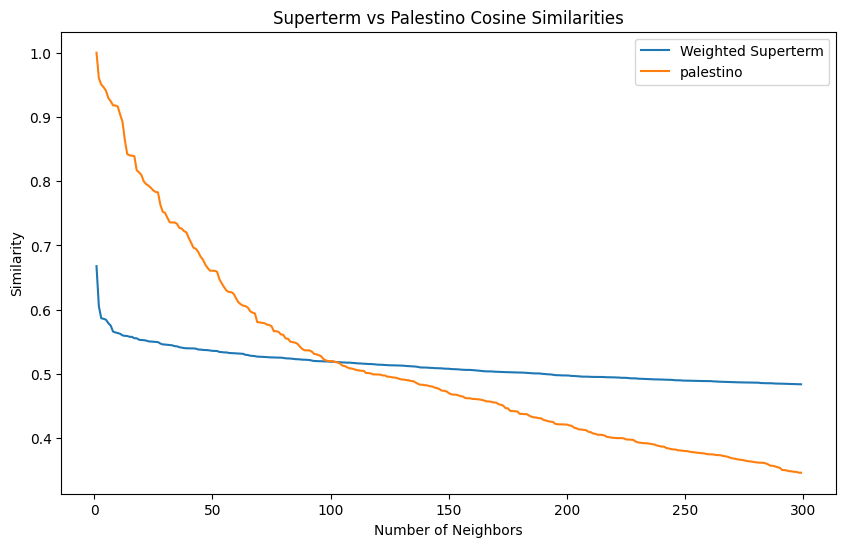

In [7]:
palestino_deserved = deserved_neighbors("palestino", test_h_df, test_superterm_cosines, palestino_cosines[0])

Si imprimimos el resultado de la función anterior, nos dará el número de vecinos semánticos merecidos para la palabra objetivo:

In [8]:
print(palestino_deserved)

101


Con esta información podremos estimar el contorno de nuestra palabra objetivo utilizando de nuevo la función `gallito_neighbors_matrix`:

In [9]:
palestino_contour = gallito_neighbors_matrix("palestino", "API_KEY", "quantumlikespace_spanish", neighbors = palestino_deserved)

Obteniendo vectores: 100%|██████████| 101/101 [00:05<00:00, 17.62it/s]


Ahora, el objeto `palestino_contour` dispone de los 101 vecinos semánticos del termino objetivo, y de sus vectores de representación en el espacio semántico LSA. Este contorno conceptual nos servirá más adelante para generar el subespacio del concepto "palestino".

In [15]:
print(palestino_contour["neighbors"][:10])
print(palestino_contour["neighbors_vec"][:10])

['palestino', 'cisjordania', 'israelí', 'israel', 'gaza', 'jerusalén', 'estado_de_israel', 'hamás', 'franja_de_gaza', 'autoridad_palestina']
[[ 0.45480892  0.23688493  0.05063172 ...  0.10010288  0.11124404
  -0.19327077]
 [ 0.08652659  0.06877993 -0.00120964 ...  0.02465505  0.01612562
  -0.03701894]
 [ 0.55814209  0.34911323  0.02071892 ...  0.03455193  0.02993942
  -0.31359389]
 ...
 [ 0.07885594  0.09003437  0.01752978 ...  0.00494079  0.01391079
   0.00780887]
 [ 0.04867911  0.03985005  0.00204198 ...  0.01272901  0.00872713
  -0.0111611 ]
 [ 0.03963619  0.05076532  0.00706232 ... -0.00578314  0.00357035
  -0.0139861 ]]
